---
#Setup data files, py4cytoscape and Cytoscape connection
---
**NOTE: To run this notebook, you must manually start Cytoscape first -- don't proceed until you have started Cytoscape.**

---
##Setup: Import source data files

In [5]:
OUTPUT_DIR='output/'

---
##Setup: Fetch latest py4cytoscape




**Note that you can fetch from a specific github branch by adding "@<branch>" to the "py4cytocape" at the end of the github URL.**

For example, to get branch 0.0.5: git+https://github.com/cytoscape/py4cytoscape@0.0.5

In [6]:
!pip uninstall -y py4cytoscape

!pip install py4cytoscape
#!pip install git+https://github.com/cytoscape/py4cytoscape@0.0.5
#!pip install git+https://github.com/cytoscape/py4cytoscape

Found existing installation: py4cytoscape 0.0.8
Uninstalling py4cytoscape-0.0.8:
  Successfully uninstalled py4cytoscape-0.0.8


---
##Setup: Set up Cytoscape connection


In [7]:
import IPython
import py4cytoscape as p4c
print(f'Loading Javascript client ... {p4c.get_browser_client_channel()} on {p4c.get_jupyter_bridge_url()}')
browser_client_js = p4c.get_browser_client_js(False)
IPython.display.Javascript(browser_client_js) # Start browser client


Loading Javascript client ... 742a788e-2472-4e04-81e0-dae73f44bbdf on https://jupyter-bridge.cytoscape.org


<IPython.core.display.Javascript object>

---
#Sanity tests to verify Cytoscape connection


---
##Sanity test: Cytoscape version


In [10]:
p4c.cytoscape_version_info()

{'apiVersion': 'v1',
 'cytoscapeVersion': '3.8.2',
 'automationAPIVersion': '1.2.0',
 'py4cytoscapeVersion': '0.0.9'}

---
## Sanity test: Cytoscape's sandbox path

**Sandboxing is explained in https://py4cytoscape.readthedocs.io/en/latest/concepts.html#sandboxing**

In [11]:
p4c.sandbox_get_file_info('.')

{'filePath': 'C:\\Users\\stefa\\CytoscapeConfiguration\\filetransfer\\default_sandbox',
 'modifiedTime': '2021-06-07 15:31:07.0209',
 'isFile': False}

---
#Demonstration of file transfer and general py4cytoscape

---
##Demo: Load standard Cytoscape sample session


assert() checks verify that function result was plausible

In [12]:
assert(p4c.open_session() == {})
assert(p4c.get_network_count() == 1)
assert(p4c.get_network_name() == 'galFiltered.sif')
print('Successfully opened sample session')

Opening sampleData/sessions/Yeast Perturbation.cys...
Successfully opened sample session


---
##Demo: Download and load my session

**This is a big session, so loading it may take a minute to download it to the sandbox and then load it into Cytoscape.**

assert() checks verify that function result was plausible

In [13]:
p4c.sandbox_send_to('Affinity Purification.cys')
print('Successfully downloaded session ... beginning session load ...')
assert(p4c.open_session('Affinity Purification.cys') == {})
assert(p4c.get_network_count() == 1)
assert(p4c.get_network_name() == 'HIV-human PPI')
print('Successfully opened Affinity Purification.cys')

Successfully downloaded session ... beginning session load ...
Opening C:\Users\stefa\CytoscapeConfiguration\filetransfer\default_sandbox/Affinity Purification.cys...
Successfully opened Affinity Purification.cys


---
##Demo: Load standard Cytoscape sample network

assert() checks verify that function result was plausible

In [14]:
res = p4c.import_network_from_file()
assert(type(res['networks']) is list)
assert(len(res['networks']) == 1)
assert(type(res['views']) is list)
assert(len(res['views']) == 1)
print('Successfully loaded sample network')

Successfully loaded sample network


---
##Demo: Download and load my network

assert() checks verify that function result was plausible

In [16]:
p4c.sandbox_send_to('galFiltered.sif')
res = p4c.import_network_from_file('galFiltered.sif')
assert(type(res['networks']) is list)
assert(len(res['networks']) == 1)
assert(type(res['views']) is list)
assert(len(res['views']) == 1)
print('Successfully loaded network galFiltered.sif')

Successfully loaded network galFiltered.sif


---
##Demo: Save session and upload to Notebook's file system

**This is a 44MB file, so it may take a while for Cytoscape to save it, and then another while to upload it.**

assert() checks verify that function result was plausible

In [17]:
p4c.sandbox_remove_file('Three network session.cys')
res = p4c.save_session('Three network session')
assert(type(res) is dict)
assert(res == {})
print("Successfully saved network ... transferring network to Notebook server now ...")
p4c.sandbox_get_from('Three network session.cys', OUTPUT_DIR + 'Three network session.cys')

Successfully saved network ... transferring network to Notebook server now ...


{'filePath': 'C:\\Users\\stefa\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\Three network session.cys',
 'modifiedTime': '2021-06-07 15:32:43.0889',
 'fileByteCount': 1167651}

---
##Demo: Save network and upload to Notebook's file system

assert() checks verify that function result was plausible

In [18]:
p4c.sandbox_remove_file('HIV-human PPI.sif')
res = p4c.export_network(filename='HIV-human PPI.sif', network='HIV-human PPI', type='sif')
assert(type(res) is dict)
assert('file' in res)
print('Successfully saved HIV-human PPI')
p4c.sandbox_get_from('HIV-human PPI.sif', OUTPUT_DIR + 'HIV-human PPI.sif')

Successfully saved HIV-human PPI


{'filePath': 'C:\\Users\\stefa\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\HIV-human PPI.sif',
 'modifiedTime': '2021-06-07 15:32:52.0743',
 'fileByteCount': 7181}

---
##Demo: Save visual styles and upload to Notebook's file system

assert() checks verify that function result was plausbile

In [19]:
p4c.sandbox_remove_file('styles.xml')
res = p4c.export_visual_styles()
assert(type(res) is dict)
assert('file' in res)
print('Successfully saved default visual styles file')
p4c.sandbox_get_from('styles.xml', OUTPUT_DIR + 'styles.xml')

Successfully saved default visual styles file


{'filePath': 'C:\\Users\\stefa\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\styles.xml',
 'modifiedTime': '2021-06-07 15:32:55.0944',
 'fileByteCount': 17377}

---
##Demo: Save visual styles and upload to Notebook's file system (alternate)

assert() checks verify that function result was plausible

In [20]:
p4c.sandbox_remove_file('mystyles.json')
res = p4c.export_visual_styles(filename='mystyles', type='json')
assert(type(res) is dict)
assert('file' in res)
print('Successfully saved mystyles.json styles file')
p4c.sandbox_get_from('mystyles.json', OUTPUT_DIR + 'mystyles.json')

Successfully saved mystyles.json styles file


{'filePath': 'C:\\Users\\stefa\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\mystyles.json',
 'modifiedTime': '2021-06-07 15:32:58.0559',
 'fileByteCount': 14499}

---
##Demo: Download and load visual styles file

assert() checks verify that function result was plausible

In [21]:
p4c.sandbox_send_to(OUTPUT_DIR + 'styles.xml')
res = p4c.import_visual_styles()
assert(type(res) is list)
assert(len(res) == 1)
print('Successfully loaded from default styles file: ' + str(res))

Successfully loaded from default styles file: ['PSIMI 25 Style_0']


---
##Demo: Download and load visual styles file (alternate)

assert() checks verify that function result was plausible

In [22]:
p4c.sandbox_remove_file('custom.xml')
p4c.sandbox_send_to(OUTPUT_DIR + 'styles.xml', 'custom.xml')
res = p4c.import_visual_styles(filename='custom.xml')
assert(type(res) is list)
assert(len(res) == 1)
print('Successfully loaded from custom styles file: ' + str(res))

Successfully loaded from custom styles file: ['PSIMI 25 Style_1']


---
##Demo: Export network image and upload to Notebook's file system

assert() checks verify that function result was plausible



Successfully exported HIV-human PPI network


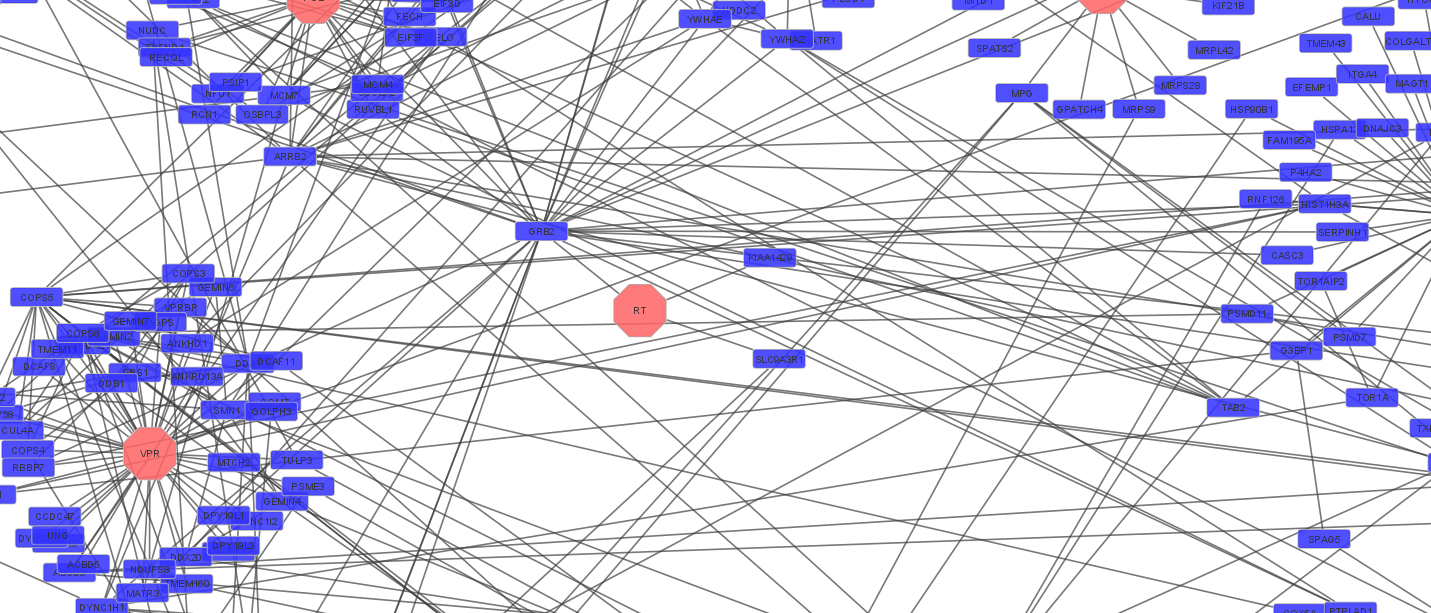

In [23]:
from IPython.display import Image

p4c.sandbox_remove_file('HIV-human PPI.png')
res = p4c.export_image('HIV-human PPI', network='HIV-human PPI')
assert(type(res) is dict)
assert('file' in res)
print('Successfully exported HIV-human PPI network')
p4c.sandbox_get_from('HIV-human PPI.png', OUTPUT_DIR + 'HIV-human PPI.png')
Image(filename=OUTPUT_DIR + 'HIV-human PPI.png')


---
##Demo: Export filters and upload to Notebook's file system

assert() checks verify that function result was plausible

In [24]:
p4c.sandbox_remove_file('filters.json')
res = p4c.export_filters()
assert(type(res) is list)
assert(len(res) == 0)
print('Successfully exported filters to filters.json')
p4c.sandbox_get_from('filters.json', OUTPUT_DIR + 'filters.json')


Successfully exported filters to filters.json


{'filePath': 'C:\\Users\\stefa\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\filters.json',
 'modifiedTime': '2021-06-07 15:33:11.0798',
 'fileByteCount': 1529}

---
##Demo: Download and load custom filters

Note that these custom filters don't match the network they're loaded into. They won't do much.

assert() checks verify that function result was plausible

In [26]:
p4c.sandbox_send_to('All Predicates.filter')
res = p4c.import_filters(filename='All Predicates.filter')
assert(type(res) is list)
assert(len(res) == 0)
print('Successfully loaded from custom filters file')

Successfully loaded from custom filters file


---
##Demo: Install and/or activate MCODE app

The MCODE app could be installed, disabled or not installed at all. If it's not installed or it's disabled, install and enable it. If it's already installed, make sure it's the latest version.

In [ ]:
# Cytoscape is having trouble with app functions, so this section is skipped
# PLEASE MANUALLY VERIFY THAT MCODE 2.0 OR GREATER IS INSTALLED

# if p4c.get_app_status('MCODE')['status'] == 'Installed':
#   p4c.update_app('MCODE') # Update it if it's not at current version
# else:
#   p4c.install_app('MCODE') # Install it if it wasn't installed
#   p4c.enable_app('MCODE') # Re-enable it if it wasn't enabled
# print(f"Success trying to install/update/activate MCODE ... result: {p4c.get_app_status('MCODE')['status']}")

#Application shows creating networks, calculating clusters, and showing subnetworks

---
##App Part 1: Load sample session and calculate edges

**Note that this uses the Cytoscape session already loaded into the Cytoscape sandbox by default.**

The output will be a dataframe that shows the network's edges.

*Question:* Where did 'sampleData/sessions/Affinity Purification.cys' come from ... there was no explicit sandbox_send_to() call? 

*Answer:* When a sandbox is created, it is seeded with a copy of the sampleData folder already in the Cytoscape install directory. There are many samples in this folder.

In [27]:
 import uuid
 import re
 import pandas as df
 import time


 p4c.open_session('sampleData/sessions/Affinity Purification.cys')
 edges = p4c.get_all_edges()
 sources = [re.match('(\S*) \(.*\) (\S*)', edge).group(1)   for edge in edges]
 targets = [re.match('(\S*) \(.*\) (\S*)', edge).group(2)   for edge in edges]
 edge_data = {'source': sources, 'target': targets}

 edges_frame = df.DataFrame(data=edge_data, columns=['source', 'target'])
 edges_frame

Opening C:\Users\stefa\CytoscapeConfiguration\filetransfer\default_sandbox/sampleData/sessions/Affinity Purification.cys...


,source,target
0,P07814,P41252
1,Q9Y266,P21796
2,Q9UHI6,Q99623
3,Q9UHI6,Q16637
4,Q9UHI6,O76071
...,...,...
1212,P48047,P29372
1213,Q9Y2W1,P61981
1214,Q8N163,P33993
1215,P58107,Q99623


---
##App Part 2: Create a fresh network out of just the edges

The time reported should be less than 30s.

In [28]:
network_name = uuid.uuid4().hex
start_create = time.monotonic()
network_suid = p4c.networks.create_network_from_data_frames(edges=edges_frame, title=network_name, collection=network_name + '_collection')
print(f'create took {(time.monotonic() - start_create):10.2f} seconds')

Applying default style...
Applying preferred layout
create took      12.12 seconds


---
## App Part 3: Call MCODE to calculate clusters

**Note that py4cytoscape doesn't have a function that calls MCODE. Instead, we use the commands_post technique documented here: https://py4cytoscape.readthedocs.io/en/latest/concepts.html#calling-cytoscape-apps**

The output is a list of clusters that have more than 3 nodes.

Note that you must have MCODE app installed in Cytoscape for this to work.

In [30]:
start_mcode = time.monotonic()
mcode = p4c.commands.commands_post('mcode cluster degreeCutoff=2 fluff=false fluffNodeDensityCutoff=0.1 haircut=true includeLoops=false kCore=2 maxDepthFromStart=100 network=current nodeScoreCutoff=0.2 scope=NETWORK')
print(f'mcode took {(time.monotonic() - start_mcode):10.2f} seconds')

big_clusters = [i for i in range(len(mcode['clusters'])) if len(mcode['clusters'][i]['nodes']) > 3]
big_clusters

mcode took       0.53 seconds


[0, 1, 2, 3, 4, 11]

---
## App Part 4: Image each cluster and upload to Notebook's file system

**At the end of this cell, all .png images are displayed.**

Because the .png is created in the Cytoscape sandbox, it must be uploaded to this Notebook's file system before it can be viewed.

There is a call to get_table_columns() that is never used, but it sure takes a while. It's here just to show that Cytoscape can be called for a long operation.

0 view took       0.48 seconds
0 append took       0.25 seconds
0 export took       0.36 seconds
1 view took       0.28 seconds
1 append took       0.30 seconds
1 export took       0.30 seconds
2 view took       0.30 seconds
2 append took       0.27 seconds
2 export took       0.26 seconds
3 view took       0.31 seconds
3 append took       0.20 seconds
3 export took       0.25 seconds
4 view took       0.25 seconds
4 append took       0.17 seconds
4 export took       0.20 seconds
5 view took       0.20 seconds
5 append took       0.30 seconds
5 export took       0.17 seconds


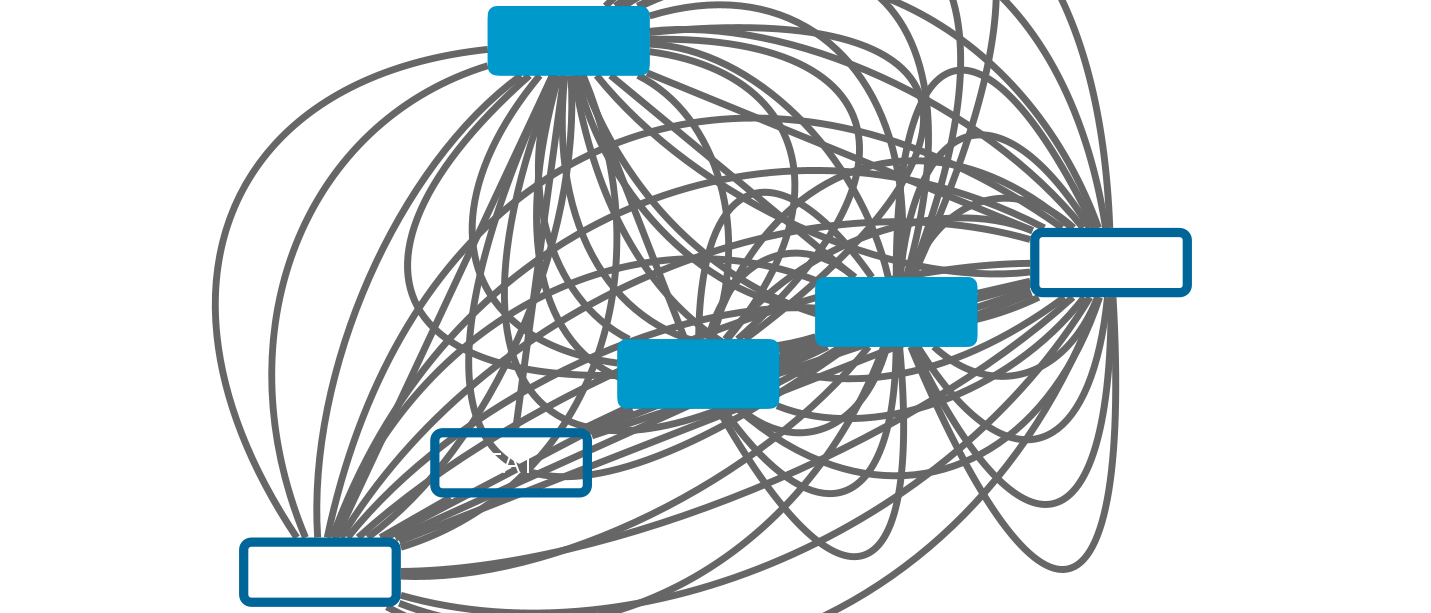

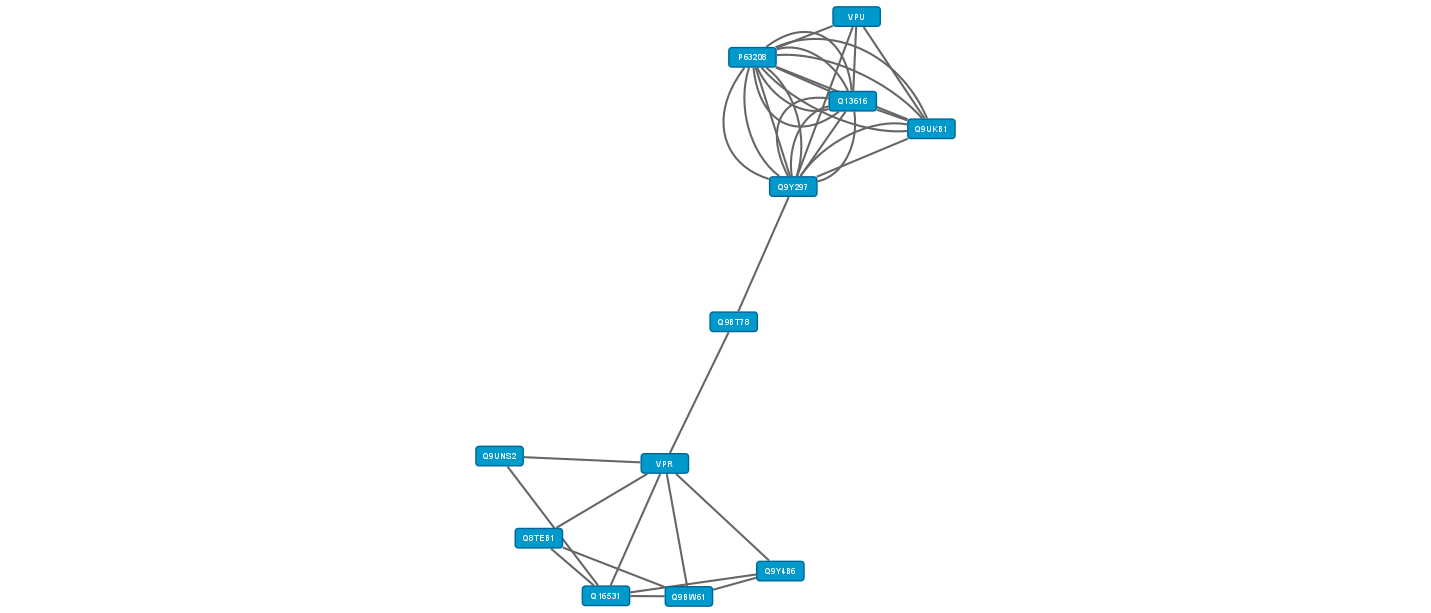

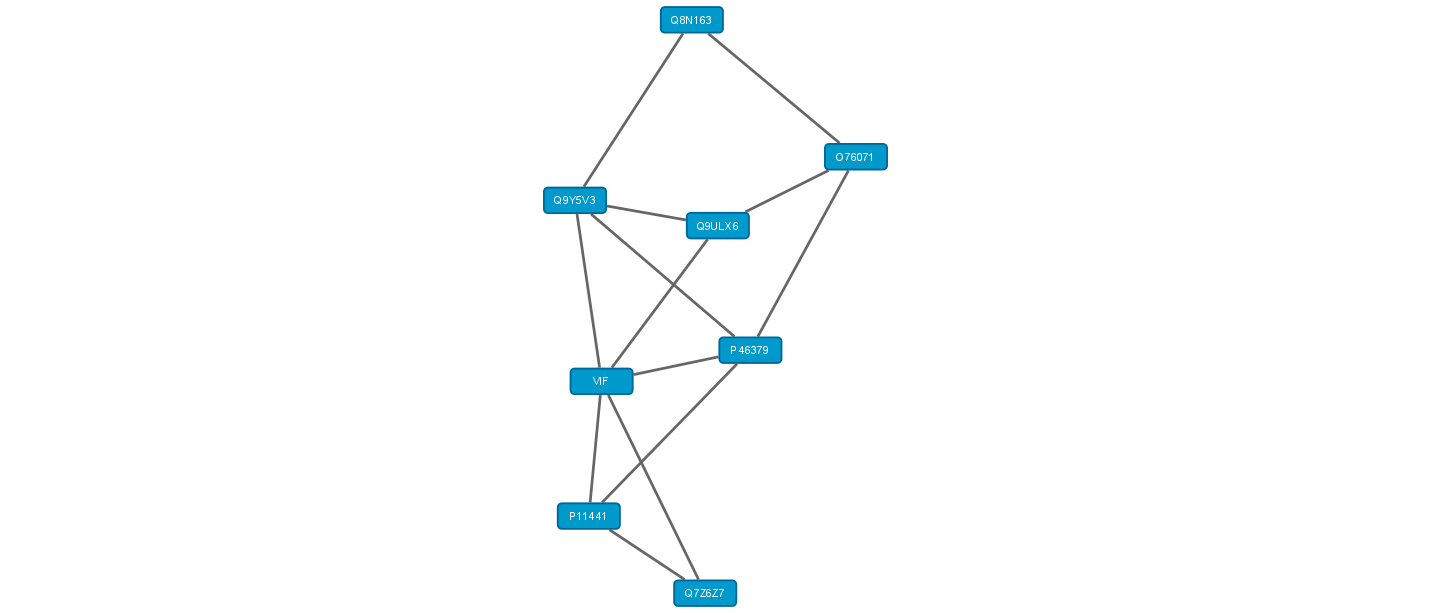

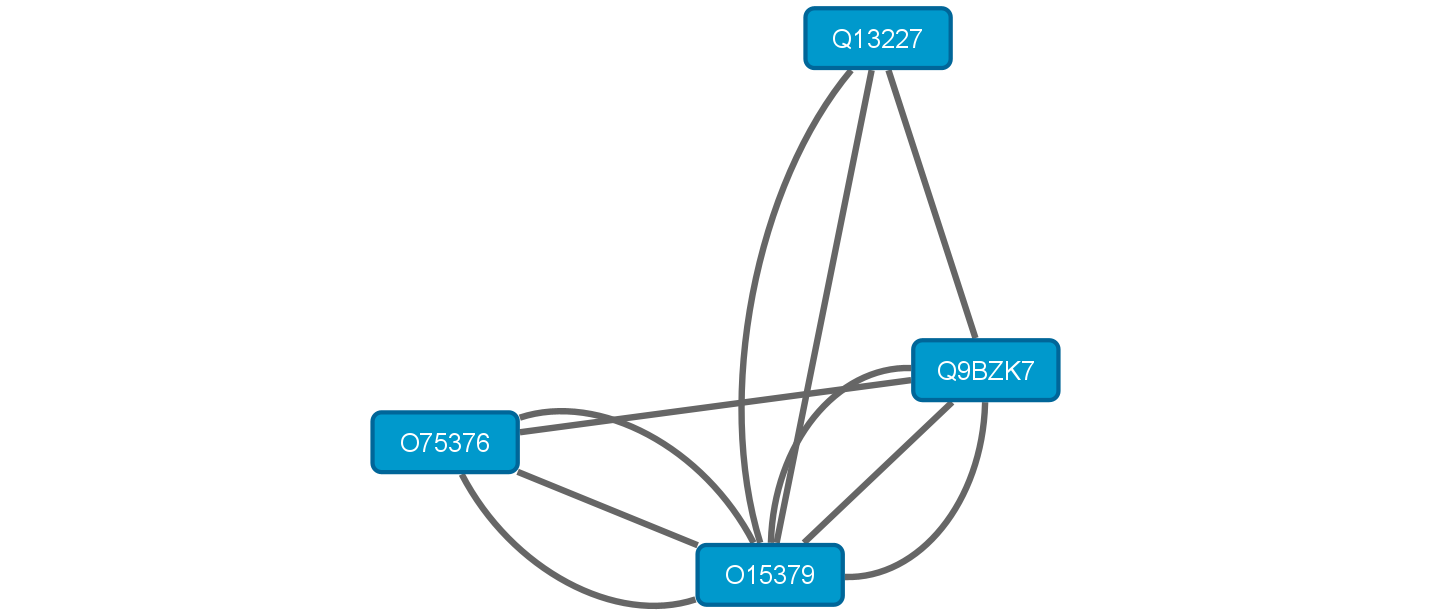

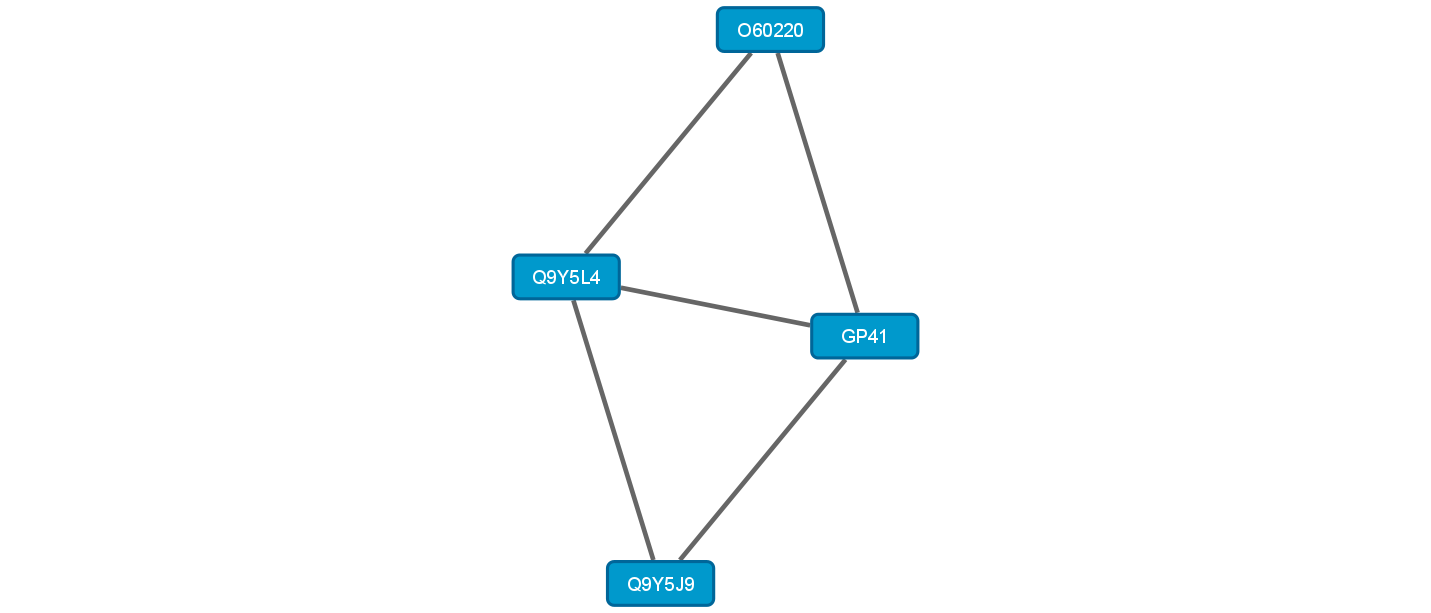

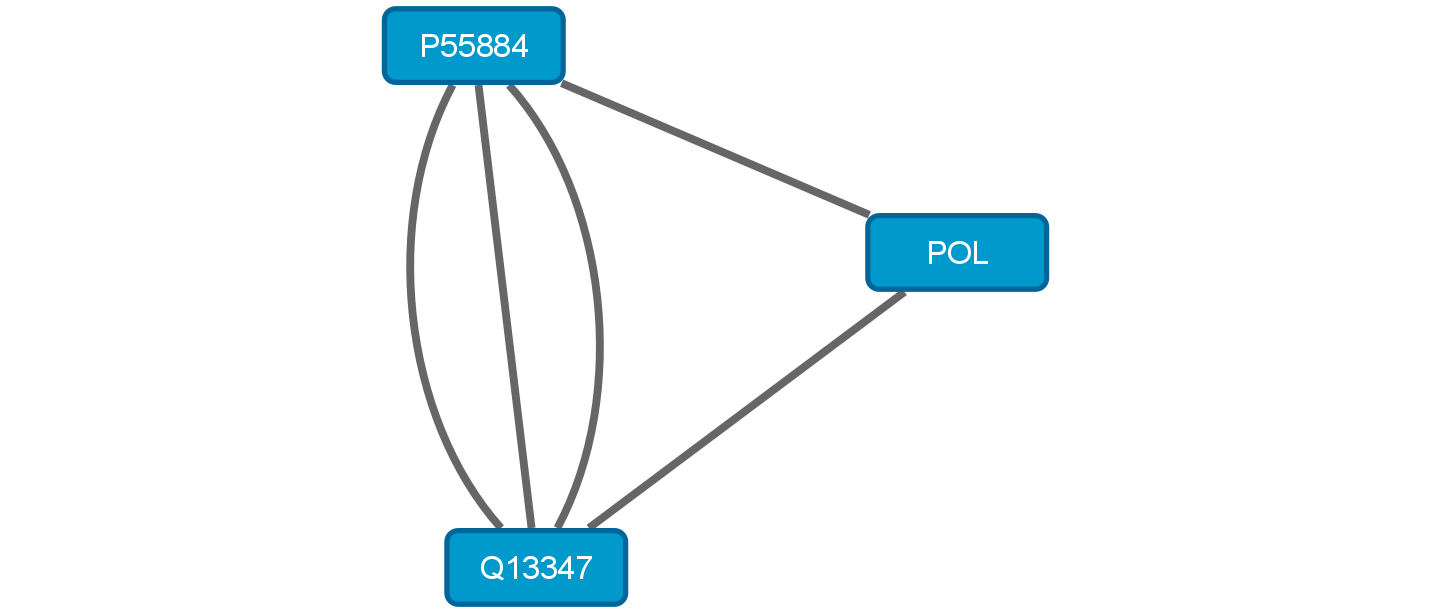

In [31]:
from IPython.display import Image, display
import os

if not os.path.exists('data'):  os.mkdir('data') # Prepare for .png files

clusters = []
list_of_images = []
for i in range(len(big_clusters)):
    start_view = time.monotonic()
    view_id = p4c.commands.commands_post('mcode view id=1 rank=' + str(i+1))
    print(f'{i} view took {(time.monotonic() - start_view):10.2f} seconds')

    start_append = time.monotonic()
    # Just for fun, show how to get a dataframe that is manipulated in Python. 
    clusters.append( p4c.tables.get_table_columns()
                      .drop(columns=['id','name','selected','MCODE::Clusters (1)','SUID'])
                      .sort_values(by=['MCODE::Score (1)'], ascending=False)
                      .reset_index(drop=True) )
    print(f'{i} append took {(time.monotonic() - start_append):10.2f} seconds')

    img_name = uuid.uuid4().hex
    start_export = time.monotonic()
    p4c.export_image(f'{img_name}')
    p4c.sandbox_get_from(f'{img_name}.png', f'{OUTPUT_DIR}{img_name}.png')
    p4c.sandbox_remove_file(f'{img_name}.png')
    print(f'{i} export took {(time.monotonic() - start_export):10.2f} seconds')
    list_of_images.append(f'{OUTPUT_DIR}{img_name}.png')
    
# Show all of the clusters
for image_name in list_of_images:
    display(Image(filename=image_name))